In [ ]:
!pip install geopandas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%matplotlib inline

import pandas as pd
import geopandas

a. caricare i quartieri in un geodataframe

In [ ]:
quartieri = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/ds964_nil_wm/NIL_WM.dbf")
quartieri

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
0,48,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8723.368714,2.406306e+06,89,"POLYGON ((9.15422 45.43775, 9.15419 45.43707, ..."
1,64,TRENNO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3309.998800,4.896921e+05,90,"POLYGON ((9.10623 45.49016, 9.10295 45.48939, ..."
2,67,PORTELLO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3800.750663,9.096022e+05,91,"POLYGON ((9.15636 45.48785, 9.15724 45.48721, ..."
3,81,BOVISASCA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7105.469715,1.578028e+06,92,"POLYGON ((9.16803 45.52234, 9.16687 45.52027, ..."
4,84,PARCO NORD,05/02/2020,Vigente,Milano 2030 - PGT Approvato,11741.717005,1.532331e+06,93,"POLYGON ((9.20040 45.52848, 9.20055 45.52828, ..."
...,...,...,...,...,...,...,...,...,...
83,68,PAGANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5221.836696,1.289686e+06,172,"POLYGON ((9.17174 45.47619, 9.17150 45.47595, ..."
84,2,BRERA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5461.667196,1.637333e+06,173,"POLYGON ((9.19165 45.46906, 9.19105 45.46843, ..."
85,33,ROGOREDO - SANTA GIULIA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6012.496435,1.200116e+06,174,"POLYGON ((9.24044 45.44427, 9.24084 45.44424, ..."
86,17,ADRIANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,9276.875747,2.433358e+06,175,"POLYGON ((9.26729 45.51234, 9.26701 45.51241, ..."


b. visualizzare l'intestazione

In [ ]:
quartieri.head(0)

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry


c. visualizzare i nomi di tutti i quartieri presenti in ordine alfabetico

In [ ]:
quartieri.sort_values(by=["NIL"], inplace = True)
quartieri

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
86,17,ADRIANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,9276.875747,2.433358e+06,175,"POLYGON ((9.26729 45.51234, 9.26701 45.51241, ..."
69,80,AFFORI,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6470.396969,2.070816e+06,158,"POLYGON ((9.17767 45.51899, 9.17796 45.51848, ..."
36,87,ASSIANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,16203.755410,5.840942e+06,125,"POLYGON ((9.04687 45.46276, 9.04688 45.46276, ..."
65,55,BAGGIO - Q.RE DEGLI OLMI - Q.RE VALSESIA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,11963.033873,3.471750e+06,154,"POLYGON ((9.09315 45.46938, 9.09393 45.46802, ..."
57,52,BANDE NERE,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6776.458948,2.663780e+06,146,"POLYGON ((9.12727 45.46894, 9.12874 45.46840, ..."
...,...,...,...,...,...,...,...,...,...
31,32,TRIULZO SUPERIORE,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6923.734083,1.389578e+06,120,"POLYGON ((9.26378 45.43251, 9.26384 45.43248, ..."
44,28,UMBRIA - MOLISE - CALVAIRATE,05/02/2020,Vigente,Milano 2030 - PGT Approvato,4912.251168,1.192352e+06,133,"POLYGON ((9.22392 45.45969, 9.22392 45.45934, ..."
38,38,VIGENTINO - Q.RE FATIMA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6479.236348,1.853163e+06,127,"POLYGON ((9.20060 45.43608, 9.20429 45.43642, ..."
27,71,VILLAPIZZONE - CAGNOLA - BOLDINASCO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8375.003494,3.426941e+06,116,"POLYGON ((9.16204 45.49690, 9.16012 45.49570, ..."


d. visualizzare tutti i quartieri su una mappa di Milano

In [ ]:
!pip install contextily

import contextily as ctx

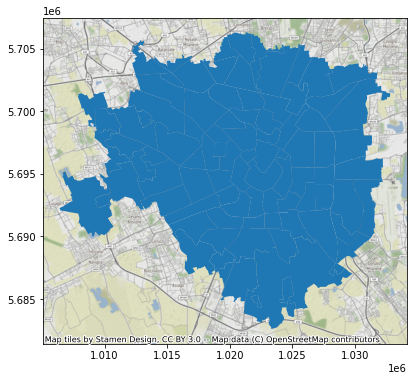

In [ ]:
#   vedere i quartieri su una mappa

milano = quartieri.to_crs(epsg = 3857)
ax = milano.plot(figsize= (12,6))
ctx.add_basemap(ax)

e. cercare il quartiere che contiene il Duomo di Milano

In [ ]:
from shapely.geometry import Point

###   loc_duomo assume il valore delle coordinate del duomo
loc_duomo = Point(9.191383, 45.464211)

##  cerca nel df la riga che contiene le coordinate del duomo
quartiere_duomo = quartieri[quartieri.contains(loc_duomo)]
quartiere_duomo

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
12,1,DUOMO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7571.275544,2.341616e+06,101,"POLYGON ((9.19482 45.47201, 9.19495 45.47213, ..."


f. visualizzare sulla mappa il Duomo di Milano e il quartiere che lo contiene

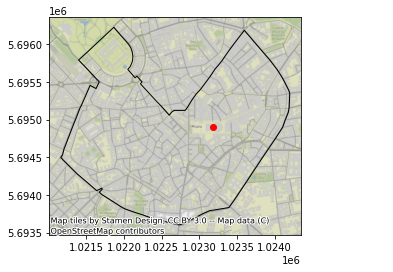

In [ ]:
ax = quartiere_duomo.to_crs(epsg = 3857).plot(edgecolor = "k", facecolor = "None")
punto_duomo = geopandas.GeoSeries([duomo], crs = "EPSG:4326").to_crs(epsg=3857).plot( ax = ax,color = "red")
ctx.add_basemap(ax)

g. visualizzare i quartieri vicini a quello che contiene il Duomo


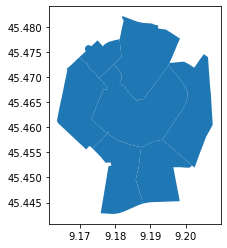

In [ ]:
###   visualizzare i quartieri intorno al quartiere che contiene il duomo

quartieri[quartieri.intersects(quartiere_duomo.geometry.squeeze())].plot()